# **Objective Understanding /Bab 1 Awal**

In this stage, the problem is defined, and the objective of the analysis is identified. The data science team should work  to understand the problem and define the goals.

Buat analisa berbasis machine learning dengan judul : **Machine Learning untuk Memprediksi Data yang Hilang dalam Data Vaksinasi di Jawa Timur"21"**

Hipotesis :      Vaiksinasi  Covid-19 meningkat karena masyarakat memerlukan vaksin tersebut

Mencari model ML yang tepat untuk mengolah dataset yang tersedia

# **Data Understanding / Bab 1 Akhir**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from pandas.tseries.offsets import DateOffset

**Insight**

Menganalisis dataset guna menghitung Keefektifan vaksin dalam menanggulangi kasus baru dan kematian COVID 19

Mendapatkan ide model yang akan digunakan (time series model apa)

**Dataset**

Terdapat 2 dataset yang diambil dari kaggle.

https://www.kaggle.com/datasets/riqulaziz/case-vaccination-covid19-indonesia-dataset

*Dataset 1 : Indonesia_coronavirus_daily_data.csv*

In [3]:
#raw_icd_data = pd.read_csv(r'D:\Google Drive\Money Maker\Kuliah\Materi & Tugas\Statistika\UTS Project Machine Learning\Dataset\COVID-19 Indonesia Dataset (Case and Vaccination)\COVID-19 Case Data\National Data\Indonesia_coronavirus_daily_data.csv')
#raw_icd_data

# Untuk Run di Google Collab, pakai ini, uncommment kode dibawah ini dan comment kode diatas

url = 'https://raw.githubusercontent.com/fqKm/Collage-Tasks/main/Indonesia_coronavirus_daily_data.csv'
raw_icd_data = pd.read_csv(url)
raw_icd_data

,Date,Province,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
0,2020-03-01,DKI JAKARTA,2,0,0,2,2,0,0,2
1,2020-03-02,DKI JAKARTA,2,0,0,2,4,0,0,4
2,2020-03-03,DKI JAKARTA,2,0,0,2,6,0,0,6
3,2020-03-04,DKI JAKARTA,2,0,0,2,8,0,0,8
4,2020-03-05,DKI JAKARTA,0,1,0,-1,8,0,1,7
...,...,...,...,...,...,...,...,...,...,...
17608,2021-08-14,NUSA TENGGARA TIMUR,649,21,892,-264,52686,42250,1016,9420
17609,2021-08-15,NUSA TENGGARA TIMUR,498,7,1421,-930,53184,43671,1023,8490
17610,2021-08-16,NUSA TENGGARA TIMUR,438,18,969,-549,53622,44640,1041,7941
17611,2021-08-17,NUSA TENGGARA TIMUR,657,15,633,9,54279,45273,1056,7950


*Legend*

Date: Means the Date of Observation

Province: Means Location/ Province which the data was observed

Daily_Case: Means Daily new number of confirmed case in observed province

Daily_Death: Means Daily new number of confirmed death in observed province

Daily_Recovered: Means Daily new number of confirmed recover in observed province

Active_Case: Means Daily new number of active case such as isolated or threated in hospital (still didnt recover nor die)

Cumulative_Case: Means total for each day number number of confirmed case of the row's date, for the row's province

Cumulative_Recovered: Means total for each day number number of confirmed Recover of the row's date, for the row's province

Cumulative_Death: Means total for each day number of confirmed death of the row's date, for the row's province

Cumulative_Active_Case: Means total for each day number of active case of the row's date, for the row's province

*Note*

angka negatif pada Active_Case menyatakan bahwa angka kasus aktif hariannya negatif, artinya jumlah kesembuhan dan/atau kematian pada hari tersebut melebihi jumlah kasus baru.

Kasus aktif biasanya dihitung dari jumlah total kasus terkonfirmasi dikurangi jumlah kesembuhan dan kematian. Jika lebih banyak orang yang sembuh atau meninggal dibandingkan yang baru terinfeksi pada hari tertentu, maka jumlah kasus aktif akan menurun, sehingga berpotensi menghasilkan angka negatif untuk perubahan harian kasus aktif.

In [4]:
raw_icd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17613 entries, 0 to 17612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    17613 non-null  object
 1   Province                17613 non-null  object
 2   Daily_Case              17613 non-null  int64 
 3   Daily_Death             17613 non-null  int64 
 4   Daily_Recovered         17613 non-null  int64 
 5   Active_Case             17613 non-null  int64 
 6   Cumulative_Case         17613 non-null  int64 
 7   Cumulative_Recovered    17613 non-null  int64 
 8   Cumulative_Death        17613 non-null  int64 
 9   Cumulative_Active_Case  17613 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 1.3+ MB


In [5]:
#Check data hilang
check_ms_icd_data = raw_icd_data.isnull().sum()
print('jumlah data yang hilang:','\n')
print(check_ms_icd_data)


jumlah data yang hilang: 

Date                      0
Province                  0
Daily_Case                0
Daily_Death               0
Daily_Recovered           0
Active_Case               0
Cumulative_Case           0
Cumulative_Recovered      0
Cumulative_Death          0
Cumulative_Active_Case    0
dtype: int64


Tidak ada data data hilang

*Dataset 2 : Vaksinasi Jawa Timur.csv*

In [6]:
#raw_vjt_data = pd.read_csv(r"D:\Google Drive\Money Maker\Kuliah\Materi & Tugas\Statistika\UTS Project Machine Learning\Dataset\COVID-19 Indonesia Dataset (Case and Vaccination)\Vaccination Data\Vaksinasi Jawa Timur.csv")
#raw_vjt_data

# Untuk Run di Google Collab, pakai ini, uncommment kode dibawah ini dan comment kode diatas

url2 = 'https://raw.githubusercontent.com/fqKm/Collage-Tasks/main/Vaksinasi%20Jawa%20Timur.csv'
raw_vjt_data = pd.read_csv(url2)
raw_vjt_data

,City_or_Regency,Vaccinated,Fully_Vaccinated,Total,Date,URL,Unnamed: 6
0,KOTA SURABAYA,33420,0.0,33420,"January 14, 2021",https://twitter.com/KominfoJatim/status/134933...,NaN
1,KAB GRESIK,5920,0.0,5920,"January 14, 2021",https://twitter.com/KominfoJatim/status/134933...,NaN
2,KAB SIDOARJO,8720,0.0,8720,"January 14, 2021",https://twitter.com/KominfoJatim/status/134933...,NaN
3,KAB LUMAJANG,2960,0.0,2960,"February 1, 2021",https://twitter.com/KominfoJatim/status/135637...,NaN
4,KAB JOMBANG,4175,0.0,4175,"February 1, 2021",https://twitter.com/KominfoJatim/status/135637...,NaN
...,...,...,...,...,...,...,...
887,KAB BONDOWOSO,3053,2599.0,5652,"March 1, 2021",https://twitter.com/KominfoJatim/status/136680...,NaN
888,KAB BANGKALAN,3264,2631.0,5895,"March 1, 2021",https://twitter.com/KominfoJatim/status/136680...,NaN
889,KAB PROBOLINGGO,3584,2824.0,6408,"March 1, 2021",https://twitter.com/KominfoJatim/status/136680...,NaN
890,KAB PAMEKASAN,2858,2418.0,5276,"March 1, 2021",https://twitter.com/KominfoJatim/status/136680...,NaN


*Legend*

City_or_Regency: Location which data was observed (regency or city)

Vaccinated: Total person who get Vaccinated ( first vaccination)

Fully_Vaccinated: Total person who get Full Vaccinated (second vaccination)

Total: Total vaccin each day each location

Date: Date of observation

URL: Source of Data

In [7]:
raw_vjt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   City_or_Regency   892 non-null    object 
 1   Vaccinated        892 non-null    int64  
 2   Fully_Vaccinated  590 non-null    float64
 3   Total             892 non-null    int64  
 4   Date              892 non-null    object 
 5   URL               892 non-null    object 
 6   Unnamed: 6        0 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 48.9+ KB


In [8]:
#Check data hilang
check_md_vjt_data = raw_vjt_data.isnull().sum()
print('jumlah data yang hilang:','\n')
print(check_md_vjt_data)


jumlah data yang hilang: 

City_or_Regency       0
Vaccinated            0
Fully_Vaccinated    302
Total                 0
Date                  0
URL                   0
Unnamed: 6          892
dtype: int64


Missing vallue oada Fully vaccinated bisa diabaikan

*Check jika setiap hari aktifitas vaksinasi terdaftar*

In [9]:
# Buat backup jaga jaga
inspect_vjt_data = raw_vjt_data.copy()

# Buat range tanggal sesuai dataset
start_date = pd.to_datetime('January 1, 2021')
end_date = pd.to_datetime('March 1, 2021')
expected_dates = pd.date_range(start_date, end_date)

# Cari data hilang
missing_dates = expected_dates[~expected_dates.isin(inspect_vjt_data['Date'])]
print(missing_dates)


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10', '2021-01-11', '2021-01-12',
               '2021-01-13', '2021-01-15', '2021-01-16', '2021-01-17',
               '2021-01-18', '2021-01-19', '2021-01-20', '2021-01-21',
               '2021-01-22', '2021-01-23', '2021-01-24', '2021-01-25',
               '2021-01-26', '2021-01-27', '2021-01-28', '2021-01-29',
               '2021-01-30', '2021-01-31', '2021-02-05', '2021-02-15',
               '2021-02-18', '2021-02-19', '2021-02-25'],
              dtype='datetime64[ns]', freq=None)


Check jika tanggal hilang berada pada lingkup penelitian (1 February 2021 - 1 Maret 2021)

In [10]:
# Buat range tanggal sesuai lingkup penelitian
start_date = pd.to_datetime('February 1, 2021')
end_date = pd.to_datetime('March 1, 2021')
research_scope_date = pd.date_range(start_date, end_date)

# Cari tanggal yang hilang
missing_dates_2 = research_scope_date[~research_scope_date.isin(inspect_vjt_data['Date'])]
print(missing_dates_2)

DatetimeIndex(['2021-02-05', '2021-02-15', '2021-02-18', '2021-02-19',
               '2021-02-25'],
              dtype='datetime64[ns]', freq=None)


<span style="color:red">Warning!</span>

Ada missing value pada tanggal lingkup penelitian, akan di atasi di data preparation


*Notes*

Hanya ada data vaksinasi dari daerah Jawa Timur, yang maka data kasus covid yang akan di amati hanya pada provinsi Jawa Timur saja

ada data yang NaN

**Data yang tidak perlu**

*Dataset 1 : Indonesia_coronavirus_daily_data.csv*

1.  Tanggal sebelum 1 February 2021
2.  Tanggal sesudah 1 Maret 2021

*Dataset 2 : Vaksinasi Jawa Timur.csv*

1. URL
2. Unnamed

**Yang perlu diperbaiki**

1. Tanggal vaksinasi jadikan datetime

# **Data Preparation/bab 3 Awal**
# **Kode persiapan data**

 In this stage, the data science team cleans, transforms, and prepares the data for analysis. This step is critical to ensure that the data is in the right format and quality for analysis.

**To-Dos**

1.  Check Data
2.  Hapus data tidak perlu
3.  Perbaiki atau hapus saja data rusak/hilang
4.  Ambil sampel Kasus Covid-19 di provinsi Jawa Timur, menyesuaikan dataset vaksinasi yang tersedia

*Dataset 2 : Vaksinasi Jawa Timur.csv*

In [11]:
step1_vjt_data = raw_vjt_data.drop(['City_or_Regency','URL','Unnamed: 6'], axis=1, inplace=False)
step1_vjt_data

,Vaccinated,Fully_Vaccinated,Total,Date
0,33420,0.0,33420,"January 14, 2021"
1,5920,0.0,5920,"January 14, 2021"
2,8720,0.0,8720,"January 14, 2021"
3,2960,0.0,2960,"February 1, 2021"
4,4175,0.0,4175,"February 1, 2021"
...,...,...,...,...
887,3053,2599.0,5652,"March 1, 2021"
888,3264,2631.0,5895,"March 1, 2021"
889,3584,2824.0,6408,"March 1, 2021"
890,2858,2418.0,5276,"March 1, 2021"


In [12]:
step2_vjt_data = step1_vjt_data.copy()
step2_vjt_data['Date'] = pd.to_datetime(step2_vjt_data['Date'], format='mixed')
step2_vjt_data.head()

,Vaccinated,Fully_Vaccinated,Total,Date
0,33420,0.0,33420,2021-01-14
1,5920,0.0,5920,2021-01-14
2,8720,0.0,8720,2021-01-14
3,2960,0.0,2960,2021-02-01
4,4175,0.0,4175,2021-02-01


In [13]:
# Filter data vaksinasi yang tanggalnya lebih dari 1 Februari 2021
step3_vjt_data = step2_vjt_data[step2_vjt_data['Date'] >= pd.to_datetime('2021-02-01')]
step3_vjt_data.head()


,Vaccinated,Fully_Vaccinated,Total,Date
3,2960,0.0,2960,2021-02-01
4,4175,0.0,4175,2021-02-01
5,2270,0.0,2270,2021-02-01
6,3518,0.0,3518,2021-02-01
7,1413,0.0,1413,2021-02-01


*Dataset 1 : Indonesia_coronavirus_daily_data.csv*

In [14]:
#step 1 : Buat backup
step1_icd_data = raw_icd_data.copy()

#step 2 : Filter data COVID-19 di Jawa Timur
step2_icd_data = step1_icd_data[raw_icd_data['Province'] == 'JAWA TIMUR']

#step 3 : Drop kolom 'Province'
step3_icd_data = step2_icd_data.drop('Province', axis=1)

#step 4 : Ubah tipe data kolom 'Date' menjadi datetime agar bisa diolah
step3_icd_data['Date'] = pd.to_datetime(step3_icd_data['Date'], format='mixed')
step3_icd_data.head()

,Date,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
1071,2020-01-08,9,3,1,5,9,1,3,5
1072,2020-01-09,0,1,23,-24,9,24,4,-19
1073,2020-01-10,0,1,14,-15,9,38,5,-34
1074,2020-01-11,0,3,8,-11,9,46,8,-45
1075,2020-01-12,0,3,1,-4,9,47,11,-49


In [15]:
# Filter data kasus covid yang tanggalnya lebih dan sama dengan 1 Februari 2021 dan kurang dan sama dengan 1 Maret 2021
step4_icd_data = step3_icd_data[step3_icd_data['Date'] >= pd.to_datetime('2021-02-01')]
step5_icd_data = step4_icd_data[step4_icd_data['Date'] <= pd.to_datetime('2021-03-01')]
step5_icd_data.head()


,Date,Daily_Case,Daily_Death,Daily_Recovered,Active_Case,Cumulative_Case,Cumulative_Recovered,Cumulative_Death,Cumulative_Active_Case
1461,2021-02-01,669,36,929,-296,113586,98343,8078,7165
1462,2021-02-02,809,51,918,-160,114395,99261,8129,7005
1463,2021-02-03,719,64,662,-7,115114,99923,8193,6998
1464,2021-02-04,595,57,874,-336,115709,100797,8250,6662
1465,2021-02-05,753,61,835,-143,116462,101632,8311,6519


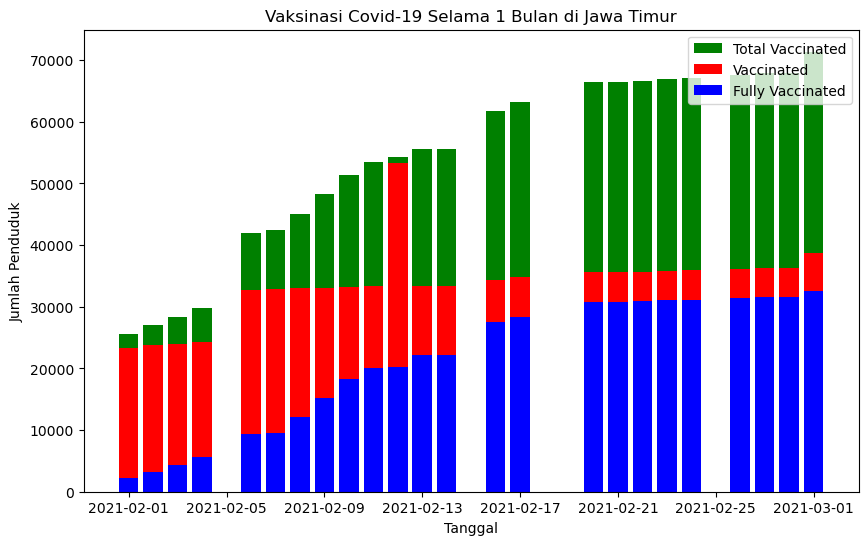

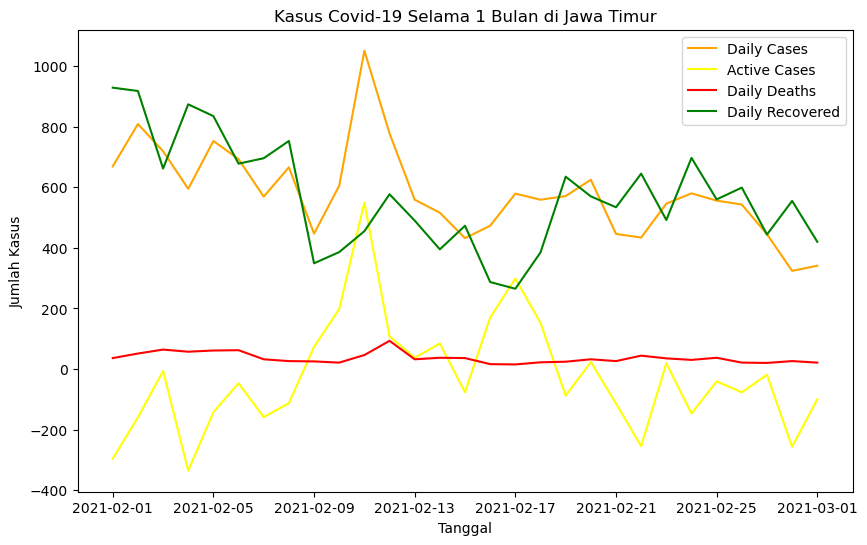

In [16]:
# Plotting vaksinasi dengan Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(step3_vjt_data['Date'], step3_vjt_data['Total'], label='Total Vaccinated', color='green')
plt.bar(step3_vjt_data['Date'], step3_vjt_data['Vaccinated'], label='Vaccinated', color='red')
plt.bar(step3_vjt_data['Date'], step3_vjt_data['Fully_Vaccinated'], label='Fully Vaccinated', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penduduk')
plt.title('Vaksinasi Covid-19 Selama 1 Bulan di Jawa Timur')
plt.legend()
plt.show()

# Plotting kasus covid dengan Line Chart
plt.figure(figsize=(10, 6))
plt.plot(step5_icd_data['Date'], step5_icd_data['Daily_Case'], label='Daily Cases', color='orange')
plt.plot(step5_icd_data['Date'], step5_icd_data['Active_Case'], label='Active Cases', color='yellow')
plt.plot(step5_icd_data['Date'], step5_icd_data['Daily_Death'], label='Daily Deaths', color='red')
plt.plot(step5_icd_data['Date'], step5_icd_data['Daily_Recovered'], label='Daily Recovered', color='green')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kasus')
plt.title('Kasus Covid-19 Selama 1 Bulan di Jawa Timur')
plt.legend()
plt.show()


<span style="color:red">Warning!</span>

Ada missing value pada tanggal lingkup penelitian di dataset vaksinasi

**To Do!**

Karena dataset kecil dan missing value diperlukan, jangan dihapus, ganti saja , cari metode yang terbaik untuk mengganti missing value


# **Data Preparation/bab 3 Tengah bagian 2**
# **Prediksi Data Hilang di Tanggal yang Tidak Hilang dengan Persen Rata-Rata Per Minggu**

In [17]:
# Bikin model untuk memperbaiki data hilang
# buat rata-rata untuk prediksi value hilang di tanggal yang ada

In [18]:
# Backup data vaksinasi untuk jaga jaga
df = step3_vjt_data.copy()

# Buat copy Date biar dipakai untuk Index
df['Date_Index'] = df['Date']

# Set 'Date' jadi index
df.set_index('Date_Index', inplace=True)

# Split data per minggu
unique_weeks = df.index.isocalendar().week.unique()
df1 = df[df.index.isocalendar().week == unique_weeks[0]]
df2 = df[df.index.isocalendar().week == unique_weeks[1]]
df3 = df[df.index.isocalendar().week == unique_weeks[2]]
df4 = df[df.index.isocalendar().week == unique_weeks[3]]
df5 = df[df.index.isocalendar().week == unique_weeks[4]]

df1

,Vaccinated,Fully_Vaccinated,Total,Date
Date_Index,,,,
2021-02-01,2960,0.0,2960,2021-02-01
2021-02-01,4175,0.0,4175,2021-02-01
2021-02-01,2270,0.0,2270,2021-02-01
2021-02-01,3518,0.0,3518,2021-02-01
2021-02-01,1413,0.0,1413,2021-02-01
...,...,...,...,...
2021-02-07,3398,NaN,3398,2021-02-07
2021-02-07,3304,NaN,3304,2021-02-07
2021-02-07,4042,NaN,4042,2021-02-07


In [19]:
df2

,Vaccinated,Fully_Vaccinated,Total,Date
Date_Index,,,,
2021-02-08,5320,NaN,5320,2021-02-08
2021-02-08,6426,1640.0,8066,2021-02-08
2021-02-08,9173,3114.0,12287,2021-02-08
2021-02-08,2681,NaN,2681,2021-02-08
2021-02-08,3540,NaN,3540,2021-02-08
...,...,...,...,...
2021-02-14,33432,22224.0,55656,2021-02-14
2021-02-14,2209,598.0,2807,2021-02-14
2021-02-14,2884,412.0,3296,2021-02-14


In [20]:
df3

,Vaccinated,Fully_Vaccinated,Total,Date
Date_Index,,,,
2021-02-16,5320,3974.0,9294,2021-02-16
2021-02-16,1559,1315.0,2874,2021-02-16
2021-02-16,6638,5334.0,11972,2021-02-16
2021-02-16,9315,6625.0,15940,2021-02-16
2021-02-16,4380,3358.0,7738,2021-02-16
...,...,...,...,...
2021-02-21,3160,2000.0,5160,2021-02-21
2021-02-21,2842,1786.0,4628,2021-02-21
2021-02-21,3181,2056.0,5237,2021-02-21


In [21]:
df4

,Vaccinated,Fully_Vaccinated,Total,Date
Date_Index,,,,
2021-02-22,3760,3717.0,7477,2021-02-22
2021-02-22,1561,1546.0,3107,2021-02-22
2021-02-22,6639,6542.0,13181,2021-02-22
2021-02-22,3460,3407.0,6867,2021-02-22
2021-02-22,5320,4404.0,9724,2021-02-22
...,...,...,...,...
2021-02-28,4504,3999.0,8503,2021-02-28
2021-02-28,1417,1360.0,2777,2021-02-28
2021-02-28,5553,5264.0,10817,2021-02-28


In [22]:
# Menghitung persentase vaksinasi lengkap di df1 dan menyimpannya di kolom baru 'Fully_Vaccinated_Percentage'
df1['Fully_Vaccinated_Percentage'] = (df1['Fully_Vaccinated'] / df1['Total']) * 100
# Menghitung rata-rata persentase vaksinasi lengkap di df1
average_percent_df1 = df1['Fully_Vaccinated_Percentage'].mean()

# Menghitung persentase vaksinasi lengkap di df2 dan menyimpannya di kolom baru 'Fully_Vaccinated_Percentage'
df2['Fully_Vaccinated_Percentage'] = (df2['Fully_Vaccinated'] / df2['Total']) * 100
# Menghitung rata-rata persentase vaksinasi lengkap di df2
average_percent_df2 = df2['Fully_Vaccinated_Percentage'].mean()

# Menghitung persentase vaksinasi lengkap di df3 dan menyimpannya di kolom baru 'Fully_Vaccinated_Percentage'
df3['Fully_Vaccinated_Percentage'] = (df3['Fully_Vaccinated'] / df3['Total']) * 100
# Menghitung rata-rata persentase vaksinasi lengkap di df3
average_percent_df3 = df3['Fully_Vaccinated_Percentage'].mean()

# Menghitung persentase vaksinasi lengkap di df4 dan menyimpannya di kolom baru 'Fully_Vaccinated_Percentage'
df4['Fully_Vaccinated_Percentage'] = (df4['Fully_Vaccinated'] / df4['Total']) * 100
# Menghitung rata-rata persentase vaksinasi lengkap di df4
average_percent_df4 = df4['Fully_Vaccinated_Percentage'].mean()

# Menghitung persentase vaksinasi lengkap di df5 dan menyimpannya di kolom baru 'Fully_Vaccinated_Percentage'
df5['Fully_Vaccinated_Percentage'] = (df5['Fully_Vaccinated'] / df5['Total']) * 100
# Menghitung rata-rata persentase vaksinasi lengkap di df5
average_percent_df5 = df5['Fully_Vaccinated_Percentage'].mean()

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\1652690600.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\1652690600.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\1652690600.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

In [23]:
average_percent_df1, average_percent_df2, average_percent_df3, average_percent_df4

(7.43410266893353, 18.807883953175295, 40.41748967840275, 46.75204786284729)

In [24]:
df1['Fully_Vaccinated'] = np.where(df1['Fully_Vaccinated'].isnull(), df1['Total'] / average_percent_df1, df1['Fully_Vaccinated'])
df1

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\3987449783.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-01,2960,0.000000,2960,2021-02-01,0.000000
2021-02-01,4175,0.000000,4175,2021-02-01,0.000000
2021-02-01,2270,0.000000,2270,2021-02-01,0.000000
2021-02-01,3518,0.000000,3518,2021-02-01,0.000000
2021-02-01,1413,0.000000,1413,2021-02-01,0.000000
...,...,...,...,...,...
2021-02-07,3398,457.082738,3398,2021-02-07,NaN
2021-02-07,3304,444.438306,3304,2021-02-07,NaN
2021-02-07,4042,543.710543,4042,2021-02-07,NaN


In [25]:
df1['Fully_Vaccinated'] = df1['Fully_Vaccinated'].round()
df1

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\608456422.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-01,2960,0.0,2960,2021-02-01,0.000000
2021-02-01,4175,0.0,4175,2021-02-01,0.000000
2021-02-01,2270,0.0,2270,2021-02-01,0.000000
2021-02-01,3518,0.0,3518,2021-02-01,0.000000
2021-02-01,1413,0.0,1413,2021-02-01,0.000000
...,...,...,...,...,...
2021-02-07,3398,457.0,3398,2021-02-07,NaN
2021-02-07,3304,444.0,3304,2021-02-07,NaN
2021-02-07,4042,544.0,4042,2021-02-07,NaN


In [26]:
df1['Total'] = np.where(df1['Fully_Vaccinated_Percentage'].isna(), df1['Vaccinated'] + df1['Fully_Vaccinated'], df1['Total'])
df1

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\3999465557.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-01,2960,0.0,2960.0,2021-02-01,0.000000
2021-02-01,4175,0.0,4175.0,2021-02-01,0.000000
2021-02-01,2270,0.0,2270.0,2021-02-01,0.000000
2021-02-01,3518,0.0,3518.0,2021-02-01,0.000000
2021-02-01,1413,0.0,1413.0,2021-02-01,0.000000
...,...,...,...,...,...
2021-02-07,3398,457.0,3855.0,2021-02-07,NaN
2021-02-07,3304,444.0,3748.0,2021-02-07,NaN
2021-02-07,4042,544.0,4586.0,2021-02-07,NaN


In [27]:
df1['Fully_Vaccinated'] = df1['Fully_Vaccinated'].astype(float).astype(int)
df1['Total'] = df1['Total'].astype(float).astype(int)
df1


C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\3938955355.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\FADLAN\AppData\Local\Temp\ipykernel_6800\3938955355.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-01,2960,0,2960,2021-02-01,0.000000
2021-02-01,4175,0,4175,2021-02-01,0.000000
2021-02-01,2270,0,2270,2021-02-01,0.000000
2021-02-01,3518,0,3518,2021-02-01,0.000000
2021-02-01,1413,0,1413,2021-02-01,0.000000
...,...,...,...,...,...
2021-02-07,3398,457,3855,2021-02-07,NaN
2021-02-07,3304,444,3748,2021-02-07,NaN
2021-02-07,4042,544,4586,2021-02-07,NaN


In [28]:
dataframes = [df2, df3, df4, df5]

for df in dataframes:
    df['Fully_Vaccinated'] = np.where(df['Fully_Vaccinated'].isnull(), df['Total'] / average_percent_df1, df['Fully_Vaccinated'])
    df['Fully_Vaccinated'] = df['Fully_Vaccinated'].round()
    df['Total'] = np.where(df['Fully_Vaccinated_Percentage'].isna(), df['Vaccinated'] + df['Fully_Vaccinated'], df['Total'])
    df['Fully_Vaccinated'] = df['Fully_Vaccinated'].astype(float).astype(int)
    df['Total'] = df['Total'].astype(float).astype(int)

In [29]:
df2

,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-08,5320,716,6036,2021-02-08,NaN
2021-02-08,6426,1640,8066,2021-02-08,20.332259
2021-02-08,9173,3114,12287,2021-02-08,25.343859
2021-02-08,2681,361,3042,2021-02-08,NaN
2021-02-08,3540,476,4016,2021-02-08,NaN
...,...,...,...,...,...
2021-02-14,33432,22224,55656,2021-02-14,39.931005
2021-02-14,2209,598,2807,2021-02-14,21.303883
2021-02-14,2884,412,3296,2021-02-14,12.500000


In [30]:
df3

,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-16,5320,3974,9294,2021-02-16,42.758769
2021-02-16,1559,1315,2874,2021-02-16,45.755045
2021-02-16,6638,5334,11972,2021-02-16,44.553959
2021-02-16,9315,6625,15940,2021-02-16,41.562108
2021-02-16,4380,3358,7738,2021-02-16,43.396226
...,...,...,...,...,...
2021-02-21,3160,2000,5160,2021-02-21,38.759690
2021-02-21,2842,1786,4628,2021-02-21,38.591184
2021-02-21,3181,2056,5237,2021-02-21,39.259118


In [31]:
df4

,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-22,3760,3717,7477,2021-02-22,49.712452
2021-02-22,1561,1546,3107,2021-02-22,49.758610
2021-02-22,6639,6542,13181,2021-02-22,49.632046
2021-02-22,3460,3407,6867,2021-02-22,49.614096
2021-02-22,5320,4404,9724,2021-02-22,45.290004
...,...,...,...,...,...
2021-02-28,4504,3999,8503,2021-02-28,47.030460
2021-02-28,1417,1360,2777,2021-02-28,48.973713
2021-02-28,5553,5264,10817,2021-02-28,48.664140


In [32]:
df5.head()

,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-03-01,38756,32610,71366,2021-03-01,45.694028
2021-03-01,15862,12303,28165,2021-03-01,43.681875
2021-03-01,4160,3538,7698,2021-03-01,45.959990
2021-03-01,1946,1552,3498,2021-03-01,44.368210
2021-03-01,6267,5930,12197,2021-03-01,48.618513


In [33]:
# Gabungkan DataFrame
merged_df = pd.concat([df1, df2, df3, df4, df5])

merged_df

,Vaccinated,Fully_Vaccinated,Total,Date,Fully_Vaccinated_Percentage
Date_Index,,,,,
2021-02-01,2960,0,2960,2021-02-01,0.000000
2021-02-01,4175,0,4175,2021-02-01,0.000000
2021-02-01,2270,0,2270,2021-02-01,0.000000
2021-02-01,3518,0,3518,2021-02-01,0.000000
2021-02-01,1413,0,1413,2021-02-01,0.000000
...,...,...,...,...,...
2021-03-01,3053,2599,5652,2021-03-01,45.983723
2021-03-01,3264,2631,5895,2021-03-01,44.631043
2021-03-01,3584,2824,6408,2021-03-01,44.069913


**Bandingkan Plotting**

In [34]:
# Jadikan "Date" sebagai index

check = step3_vjt_data.copy()
check.set_index('Date', inplace=True)

In [35]:
import plotly.express as px

# Pilih kolom
selected_columns = ['Fully_Vaccinated']
fixed = merged_df[selected_columns]

# Buat line chart with increased height
fig = px.bar(fixed, y=selected_columns, title='Vaksinasi di Bulan Februari 2021 di Jawa Timur(Sudah diperbaiki)')
fig.show()

# Pilih kolom
selected_columns = ['Fully_Vaccinated']
unfixed = check[selected_columns]

# Buat line chart with increased height
fig = px.bar(unfixed, y=selected_columns, title='Vaksinasi di Bulan Februari 2021 di Jawa Timur(belum diperbaiki)')
fig.show()

c:\Users\FADLAN\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



c:\Users\FADLAN\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2021-02-01 to 2021-03-01
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Vaccinated                   889 non-null    int64         
 1   Fully_Vaccinated             889 non-null    int32         
 2   Total                        889 non-null    int32         
 3   Date                         889 non-null    datetime64[ns]
 4   Fully_Vaccinated_Percentage  587 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1)
memory usage: 34.7 KB


In [37]:
check.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2021-02-01 to 2021-03-01
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Vaccinated        889 non-null    int64  
 1   Fully_Vaccinated  587 non-null    float64
 2   Total             889 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 27.8 KB


**ToDo**

Prediksi data pada tanggal yang Hilang

In [38]:
# Gabungin tanggal yang sama biar mudah
processed_df = merged_df.copy()
processed_df = processed_df.groupby('Date').sum().reset_index()
processed_df.head()

,Date,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage
0,2021-02-01,115378,6865,122243,16.588538
1,2021-02-02,124709,16084,140793,25.134568
2,2021-02-03,128680,18418,147098,39.193649
3,2021-02-04,132637,20721,153358,50.664166
4,2021-02-06,165313,28268,193581,56.537820


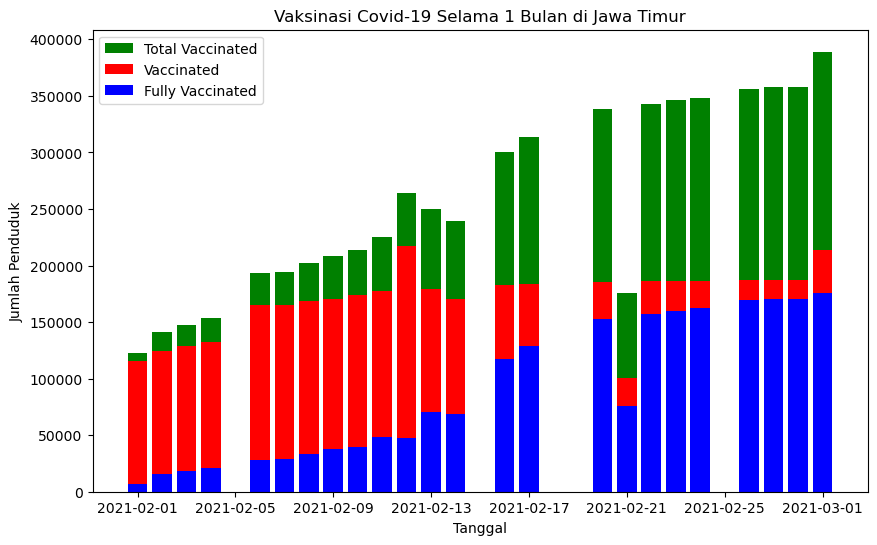

In [39]:
# Plotting vaksinasi dengan Bar Chart (sudah diperbaiki)
plt.figure(figsize=(10, 6))
plt.bar(processed_df['Date'], processed_df['Total'], label='Total Vaccinated', color='green')
plt.bar(processed_df['Date'], processed_df['Vaccinated'], label='Vaccinated', color='red')
plt.bar(processed_df['Date'], processed_df['Fully_Vaccinated'], label='Fully Vaccinated', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penduduk')
plt.title('Vaksinasi Covid-19 Selama 1 Bulan di Jawa Timur')
plt.legend()
plt.show()


In [40]:
# Set rentang tanggal dari '2021-02-01' hingga '2021-03-01'
date_range = pd.date_range(start='2021-02-01', end='2021-03-01')

# Membuat DataFrame baru dari rentang tanggal dan menggabungkannya dengan processed_df
# Jika ada tanggal di processed_df yang tidak ada di rentang tanggal, nilai kolomnya akan menjadi NaN
full_df = pd.DataFrame(date_range, columns=['Date']).merge(processed_df, on='Date', how='left')

# Mencari tanggal di mana kolom 'Vaccinated' bernilai null
missing_dates = full_df[full_df['Vaccinated'].isnull()]['Date']

# Mencetak tanggal yang hilang
print(missing_dates)

4    2021-02-05
14   2021-02-15
17   2021-02-18
18   2021-02-19
24   2021-02-25
Name: Date, dtype: datetime64[ns]


In [41]:
processed_df_copy = processed_df.copy()

# Membuat DataFrame baru dengan tanggal yang hilang dan nilai NaN untuk kolom 'Vaccinated', 'Fully_Vaccinated', dan 'Total'
missing_data = pd.DataFrame({'Date': missing_dates, 'Vaccinated': np.nan, 'Fully_Vaccinated': np.nan, 'Total': np.nan})

# Menggabungkan DataFrame processed_df dan missing_data, mengabaikan index asli dan membuat index baru
processed_df_copy = pd.concat([processed_df_copy, missing_data], ignore_index=True)

# Mengubah kolom 'Date' menjadi tipe data datetime
processed_df_copy['Date'] = pd.to_datetime(processed_df_copy['Date'])

# Mengurutkan DataFrame berdasarkan kolom 'Date'
processed_df_copy = processed_df_copy.sort_values('Date')

In [42]:
processed_df_copy.head()

,Date,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage
0,2021-02-01,115378.0,6865.0,122243.0,16.588538
1,2021-02-02,124709.0,16084.0,140793.0,25.134568
2,2021-02-03,128680.0,18418.0,147098.0,39.193649
3,2021-02-04,132637.0,20721.0,153358.0,50.664166
24,2021-02-05,NaN,NaN,NaN,NaN


# **Data Preparation / bab 3 Tengah**
# **Prediksi Tanggal Hilang dengan Random Forest**

Prediksi data Vaccinated di tanggal yang hilang


In [43]:
processed_df_copy2 = processed_df_copy.copy()

# Mengubah kolom 'Date' menjadi format ordinal dan menyimpannya di kolom baru 'Date_ordinal'
processed_df_copy2['Date_ordinal'] = processed_df_copy2['Date'].apply(lambda x: x.toordinal())

# Menghapus baris yang memiliki nilai null pada kolom 'Vaccinated' dan menyimpan hasilnya di train_df
train_df = processed_df_copy2.dropna(subset=['Vaccinated'])

# Menentukan variabel independen X (tanggal dalam format ordinal) dan variabel dependen y ('Vaccinated')
X = train_df[['Date_ordinal']]
y = train_df['Vaccinated']

# Membagi data menjadi set pelatihan dan set pengujian dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Regresi Hutan Acak dengan 100 pohon dan seed acak 42
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Mendapatkan tanggal (dalam format ordinal) di mana 'Vaccinated' bernilai null
missing_dates = processed_df_copy2[processed_df_copy2['Vaccinated'].isnull()]['Date_ordinal'].values.reshape(-1, 1)

# Memprediksi nilai 'Vaccinated' untuk tanggal yang hilang
predictions = model.predict(missing_dates)

# Mengisi nilai null kolom 'Vaccinated' dengan prediksi yang dihasilkan
processed_df_copy2.loc[processed_df_copy2['Vaccinated'].isnull(), 'Vaccinated'] = predictions

c:\Users\FADLAN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [44]:
processed_df_copy2.head()

,Date,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage,Date_ordinal
0,2021-02-01,115378.00,6865.0,122243.0,16.588538,737822
1,2021-02-02,124709.00,16084.0,140793.0,25.134568,737823
2,2021-02-03,128680.00,18418.0,147098.0,39.193649,737824
3,2021-02-04,132637.00,20721.0,153358.0,50.664166,737825
24,2021-02-05,141068.65,NaN,NaN,NaN,737826


Prediksi data Fully_Vaccinated di tanggal yang hilang


In [45]:
# Menghapus baris yang memiliki nilai null pada kolom 'Fully_Vaccinated' dan menyimpan hasilnya di train_df
train_df = processed_df_copy2.dropna(subset=['Fully_Vaccinated'])

# Menentukan variabel independen X (tanggal dalam format ordinal) dan variabel dependen y ('Fully_Vaccinated')
X = train_df[['Date_ordinal']]
y = train_df['Fully_Vaccinated']

# Membagi data menjadi set pelatihan dan set pengujian dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model Regresi Hutan Acak dengan 100 cabang dan diacak 42 kali
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Melatih model dengan data train
model.fit(X_train, y_train)

# Mendapatkan tanggal (dalam format ordinal) di mana 'Fully_Vaccinated' bernilai null
missing_dates = processed_df_copy2[processed_df_copy2['Fully_Vaccinated'].isnull()]['Date_ordinal'].values.reshape(-1, 1)

# Memprediksi nilai 'Fully_Vaccinated' untuk tanggal yang hilang
predictions = model.predict(missing_dates)

# Mengisi nilai null di kolom 'Fully_Vaccinated' dengan prediksi yang dihasilkan
processed_df_copy2.loc[processed_df_copy2['Fully_Vaccinated'].isnull(), 'Fully_Vaccinated'] = predictions

c:\Users\FADLAN\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [46]:
processed_df_copy2.head()

,Date,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage,Date_ordinal
0,2021-02-01,115378.00,6865.00,122243.0,16.588538,737822
1,2021-02-02,124709.00,16084.00,140793.0,25.134568,737823
2,2021-02-03,128680.00,18418.00,147098.0,39.193649,737824
3,2021-02-04,132637.00,20721.00,153358.0,50.664166,737825
24,2021-02-05,141068.65,22536.07,NaN,NaN,737826


Cari Total di tanggal yang hilang


In [47]:
processed_df_copy2['Total'] = processed_df_copy2['Vaccinated'] + processed_df_copy2['Fully_Vaccinated']

In [48]:
processed_df_copy2.head()

,Date,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage,Date_ordinal
0,2021-02-01,115378.00,6865.00,122243.00,16.588538,737822
1,2021-02-02,124709.00,16084.00,140793.00,25.134568,737823
2,2021-02-03,128680.00,18418.00,147098.00,39.193649,737824
3,2021-02-04,132637.00,20721.00,153358.00,50.664166,737825
24,2021-02-05,141068.65,22536.07,163604.72,NaN,737826


In [49]:
# Set 'Date' as the index
processed_df_copy2.set_index('Date', inplace=True)

# Display the first 5 rows of the DataFrame
processed_df_copy2.head()

,Vaccinated,Fully_Vaccinated,Total,Fully_Vaccinated_Percentage,Date_ordinal
Date,,,,,
2021-02-01,115378.00,6865.00,122243.00,16.588538,737822
2021-02-02,124709.00,16084.00,140793.00,25.134568,737823
2021-02-03,128680.00,18418.00,147098.00,39.193649,737824
2021-02-04,132637.00,20721.00,153358.00,50.664166,737825
2021-02-05,141068.65,22536.07,163604.72,NaN,737826


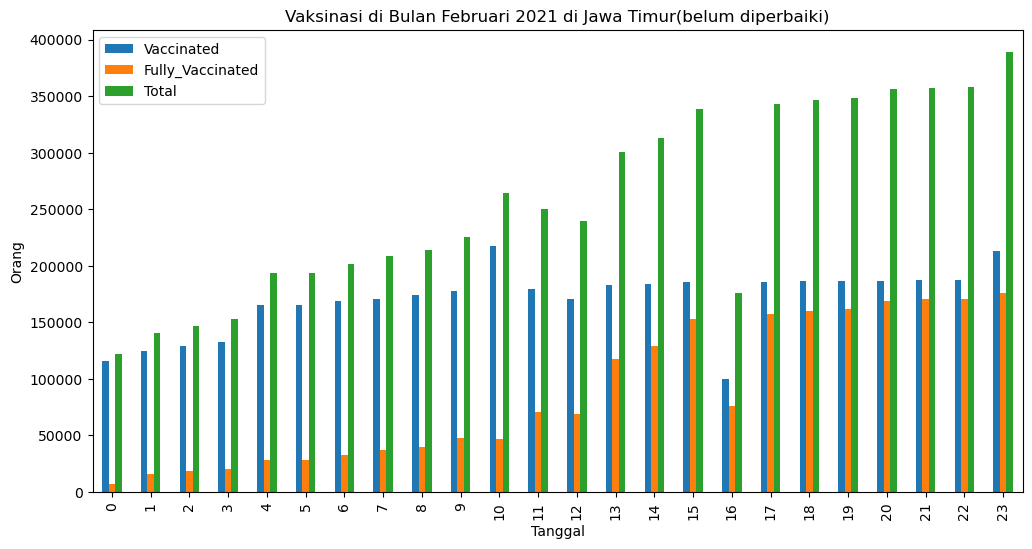

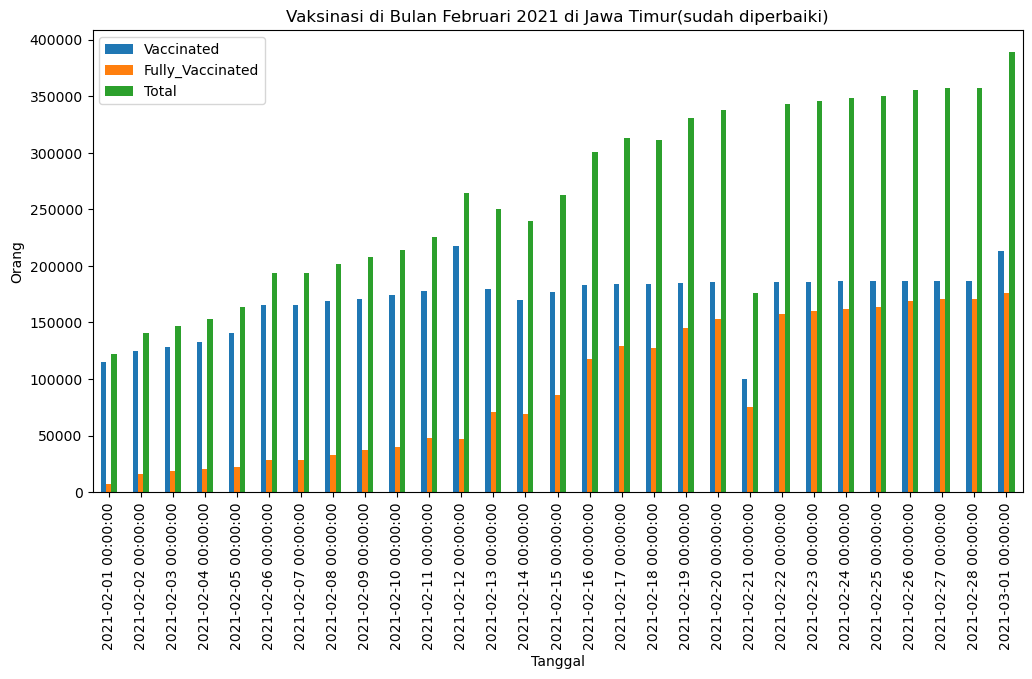

In [50]:
# Pilih kolom
selected_columns = ['Vaccinated', 'Fully_Vaccinated', 'Total']
selected_df = processed_df[selected_columns]

# Buat line chart
selected_df.plot(kind='bar', figsize=(12, 6))

# Buat judul dan label
plt.title('Vaksinasi di Bulan Februari 2021 di Jawa Timur(belum diperbaiki)')
plt.xlabel('Tanggal')
plt.ylabel('Orang')

# Tampilkan plot
plt.show()

# Pilih kolom

selected_df2 = processed_df_copy2[selected_columns]

# Buat line chart
selected_df2.plot(kind='bar', figsize=(12, 6))

# Buat judul dan label
plt.title('Vaksinasi di Bulan Februari 2021 di Jawa Timur(sudah diperbaiki)')
plt.xlabel('Tanggal')
plt.ylabel('Orang')

# Tampilkan plot
plt.show()

# **Modeling / Bab 3 Akhir**
# **Kode Model**

In this stage, the data science team selects the appropriate modeling techniques to analyze the data and build predictive models. This stage involves selecting the right algorithms, tuning the model parameters, and validating the model.

Model akan menggunakan time series dan forecasting

ARIMA (Autoregressive Integrated Moving Average) sebagai model utama

In [51]:
# Buat 'Date' jadi Datetime Index
processed_df['Date'] = pd.to_datetime(processed_df['Date'])
processed_df.set_index('Date', inplace=True)

In [52]:
# Daftar kolom untuk diprediksi
columns_to_predict = ['Vaccinated', 'Fully_Vaccinated']

# Buat DataFrame kosong untuk simpan hasil prediksi
forecast_df = pd.DataFrame()

for column in columns_to_predict:
  # Frekuensi data di set sebagai "Daily" / D
  processed_df = processed_df.asfreq('D')

  # Buat model ARIMA nya
  model = ARIMA(processed_df[column], order=(9,0,0))
  model_fit = model.fit()

  # Prediksi vaksinasi untuk 1 bulan kedepan
  future_dates = [processed_df.index[-1] + DateOffset(days=x) for x in range(0, 30)]
  future_df = pd.DataFrame(index=future_dates, columns=[column])

  # Prediksi untuk 29 hari ke depan (tidak termasuk tanggal pertama yang sudah ada di processed_df, untuk membandingkan dengan data asli)
  future_df[column] = model_fit.predict(start=processed_df.index[-1], end=processed_df.index[-1] + pd.DateOffset(days=29))

  # Tambahkan data yang sudah diprediksi ke DataFrame kosong yang sudah disiapkan
  forecast_df = pd.concat([forecast_df, future_df], axis=1)

c:\Users\FADLAN\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



# **Evaluation / Bab 4**
# **Output**

In [53]:
forecast_df.head()

,Vaccinated,Fully_Vaccinated
2021-03-01,192606.991313,171302.097257
2021-03-02,211630.199295,193660.334825
2021-03-03,187936.068193,172424.109318
2021-03-04,186834.969047,175502.816085
2021-03-05,185432.159003,180134.585533


In [54]:
# Tambahkan kolom 'Total' ke DataFrame
forecast_df['Total'] = forecast_df['Vaccinated'] + forecast_df['Fully_Vaccinated']

In [55]:
# Genapkan angka
forecast_df = forecast_df.round(0)
forecast_df.head()

,Vaccinated,Fully_Vaccinated,Total
2021-03-01,192607.0,171302.0,363909.0
2021-03-02,211630.0,193660.0,405291.0
2021-03-03,187936.0,172424.0,360360.0
2021-03-04,186835.0,175503.0,362338.0
2021-03-05,185432.0,180135.0,365567.0


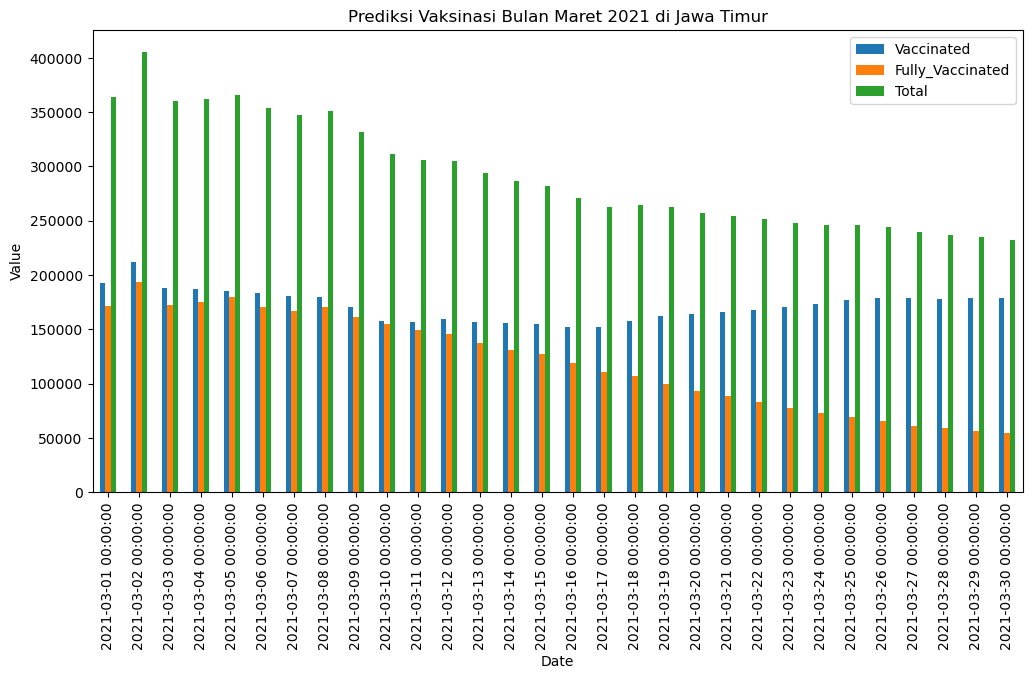

In [56]:
# Buat plot
selected_columns = ['Vaccinated', 'Fully_Vaccinated', 'Total']
selected_df2 = forecast_df[selected_columns]
selected_df2.plot(kind='bar', figsize=(12, 6))
plt.title('Prediksi Vaksinasi Bulan Maret 2021 di Jawa Timur')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

# **FLASK**

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [28/May/2024 19:00:02] "GET / HTTP/1.1" 200 -
c:\Users\FADLAN\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

c:\Users\FADLAN\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

127.0.0.1 - - [28/May/2024 19:00:05] "GET /repaired HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2024 19:00:07] "GET /repaired_full HTTP/1.1" 200 -
127.0.0.1 - - [28/May/2024 19:00:08] "GET /Maret HTTP/1.1" 200 -
c:\Users\FADLAN\anaconda3\Lib

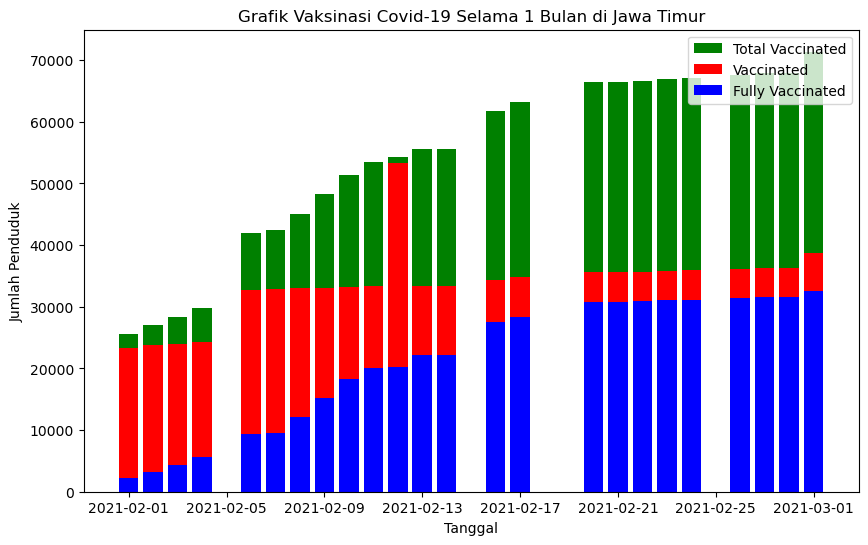

<Figure size 1200x600 with 0 Axes>

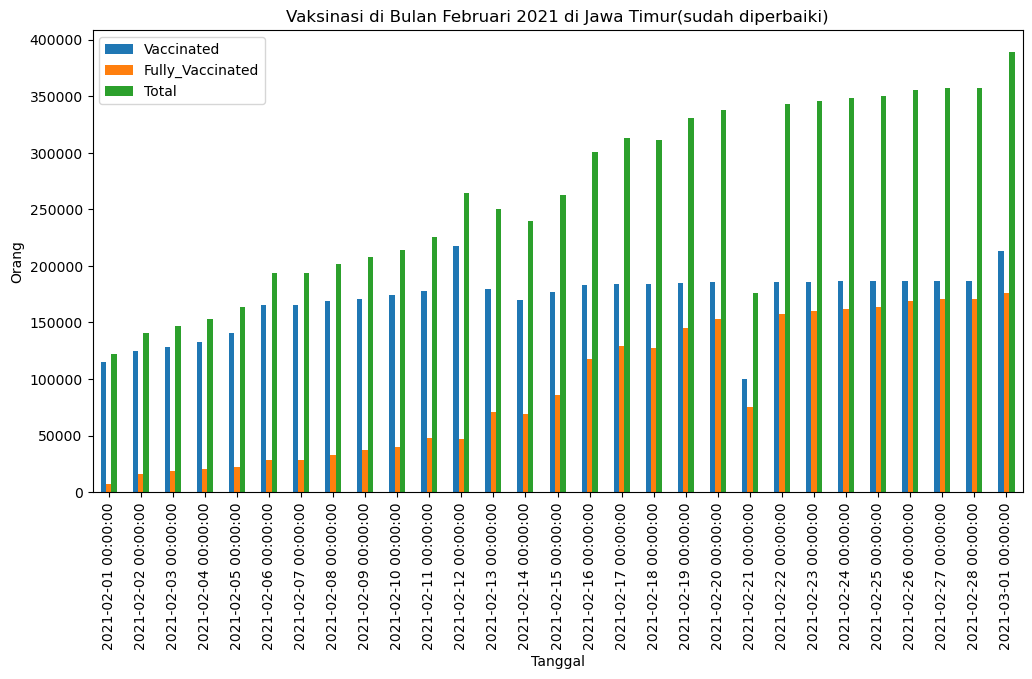

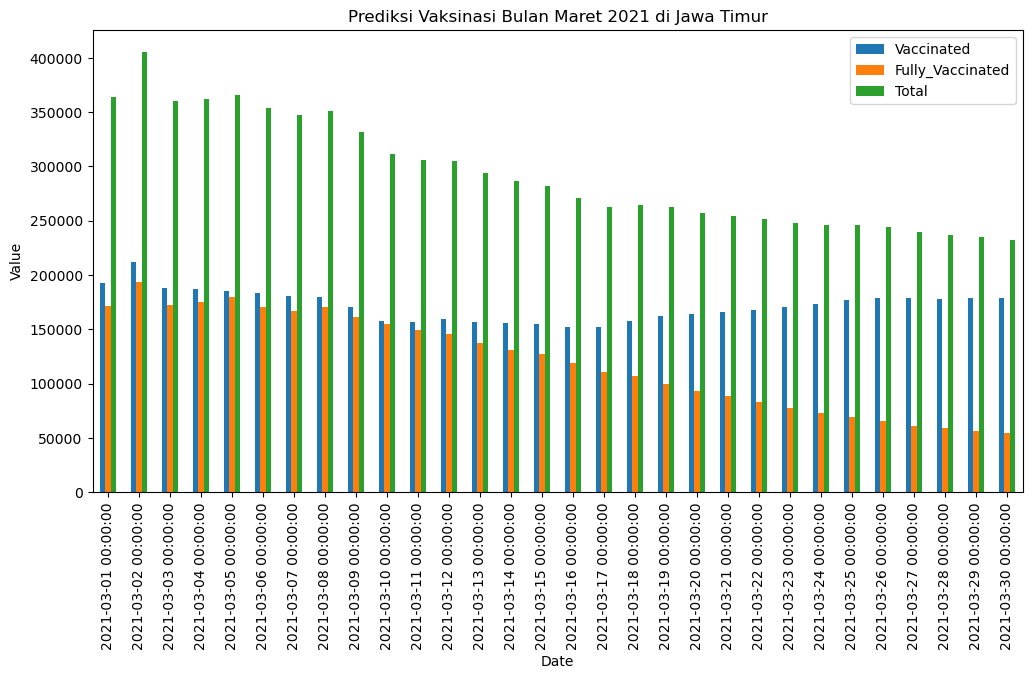

<Figure size 1200x600 with 0 Axes>

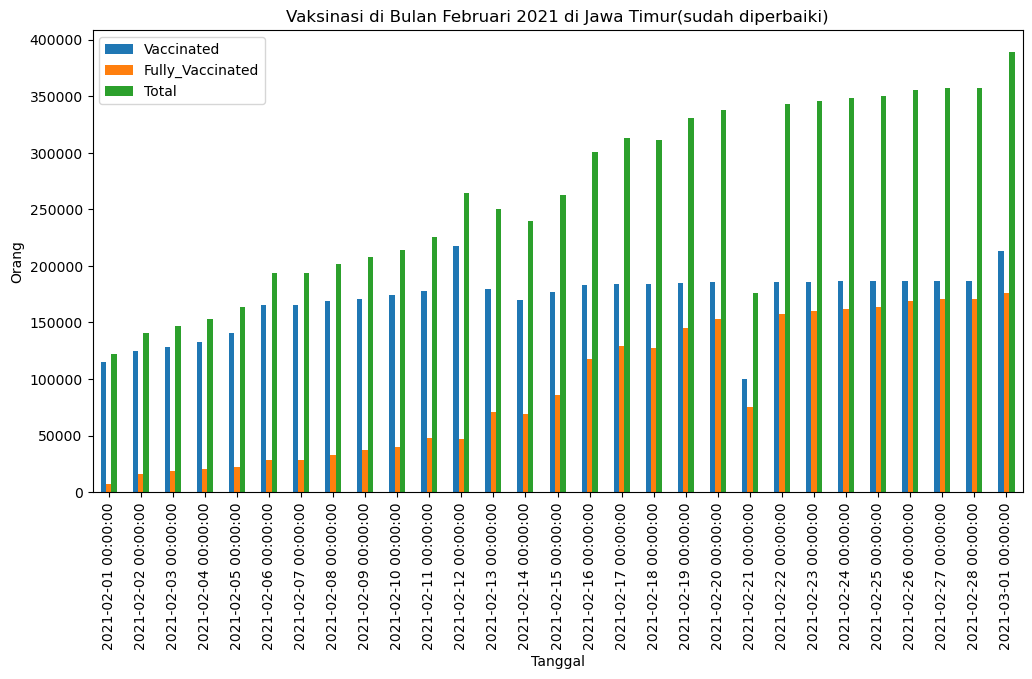

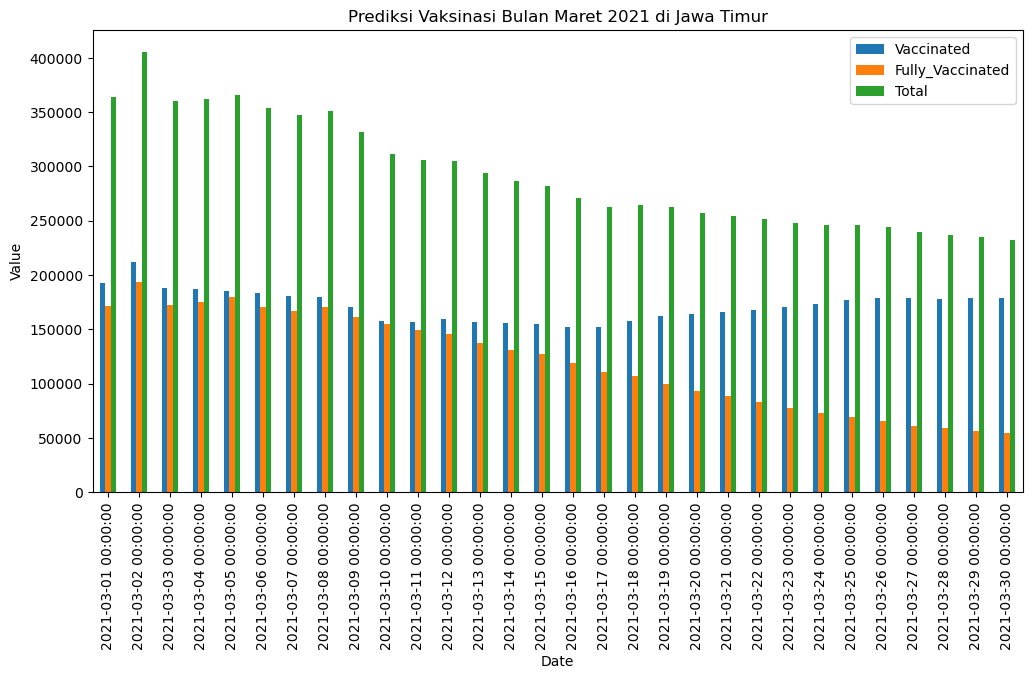

In [68]:
from flask import Flask, render_template
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import io
import base64
import urllib
import base64
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import plotly.express as px
import plotly.offline as pyo
app = Flask(__name__, template_folder= r'templates')

def mpl_to_html(fig):
    # Convert mpl figure to HTML
    img = BytesIO()
    fig.savefig(img, format='png')
    img.seek(0)
    img_base64 = base64.b64encode(img.read()).decode('utf-8')
    return urllib.parse.quote(img_base64)

@app.route('/')
def home():
    plt.figure(figsize=(10, 6))
    plt.bar(step3_vjt_data['Date'], step3_vjt_data['Total'], label='Total Vaccinated', color='green')
    plt.bar(step3_vjt_data['Date'], step3_vjt_data['Vaccinated'], label='Vaccinated', color='red')
    plt.bar(step3_vjt_data['Date'], step3_vjt_data['Fully_Vaccinated'], label='Fully Vaccinated', color='blue')
    plt.xlabel('Tanggal')
    plt.ylabel('Jumlah Penduduk')
    plt.title('Grafik Vaksinasi Covid-19 Selama 1 Bulan di Jawa Timur')
    plt.legend()
    png_image = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(png_image)
    encoded_png_image = base64.encodebytes(png_image.getvalue()).decode('utf8')
    plot = 'data:image/png;base64,{}'.format(encoded_png_image)
    table_html = step3_vjt_data.to_html()

    return render_template('Origin.html', plot=plot, table=table_html)
@app.route('/repaired_full')
def repaired():
    selected_columns = ['Vaccinated', 'Fully_Vaccinated', 'Total']
    selected_df = processed_df[selected_columns]
    selected_df.plot(kind='bar', figsize=(12, 6))

    # Create title and labels
    plt.title('Vaksinasi di Bulan Februari 2021 di Jawa Timur(belum diperbaiki)')
    plt.xlabel('Tanggal')
    plt.ylabel('Orang')
    plot1_html = mpl_to_html(plt.gcf())
    plt.clf() 
    selected_df2 = processed_df_copy2[selected_columns]
    selected_df2.plot(kind='bar', figsize=(12, 6))
    plt.title('Vaksinasi di Bulan Februari 2021 di Jawa Timur(sudah diperbaiki)')
    plt.xlabel('Tanggal')
    plt.ylabel('Orang')
    plot2_html = mpl_to_html(plt.gcf())
    table1_html = selected_df.to_html()
    table2_html = selected_df2.to_html()

    return render_template('Fully_Repaired.html', plot1=plot1_html, plot2=plot2_html, table1=table1_html, table2=table2_html)

@app.route('/Maret')
def maret():
    selected_columns = ['Vaccinated', 'Fully_Vaccinated', 'Total']
    selected_df2 = forecast_df[selected_columns]
    selected_df2.plot(kind='bar', figsize=(12, 6))
    plt.title('Prediksi Vaksinasi Bulan Maret 2021 di Jawa Timur')
    plt.xlabel('Date')
    plt.ylabel('Value')
    png_image = io.BytesIO()
    FigureCanvas(plt.gcf()).print_png(png_image)
    encoded_png_image = base64.encodebytes(png_image.getvalue()).decode('utf8')
    plot = 'data:image/png;base64,{}'.format(encoded_png_image)
    table = selected_df2.to_html()
    return render_template('Maret.html', table=table, plot=plot)
@app.route('/repaired')
def predict():
    selected_columns = ['Fully_Vaccinated']
    fixed = merged_df[selected_columns]
    fig1 = px.bar(fixed, y=selected_columns, title='Vaksinasi di Bulan Februari 2021 di Jawa Timur(Sudah diperbaiki)')
    plot1_div = pyo.plot(fig1, output_type='div')
    table1_html = fixed.to_html()
    unfixed = check[selected_columns]
    fig2 = px.bar(unfixed, y=selected_columns, title='Vaksinasi di Bulan Februari 2021 di Jawa Timur(belum diperbaiki)')
    plot2_div = pyo.plot(fig2, output_type='div')
    table2_html = unfixed.to_html()
    return render_template('Repaired.html', plot1=plot1_div, table1=table1_html, plot2=plot2_div, table2=table2_html)

if __name__ == '__main__':
    app.run(port=5000)